# This notebook is in development. Come back and check it at a future time!

# *Measuring Distances in Cosmology*

Summary

# What Does it Mean to Measure a Distance?

In our everyday lives, we think of the distance between two points as being a fixed quantity. If there is a kilometer between points A and B, then that has always been the distance between points A and B, and that always will be the distance between points A and B. 

However, physics tells us that this isn't always the case. For example, in Albert Einstein's theory of Special Relativity, the distance between two galaxies is measured to be shorter when the observer is moving towards or away from the galaxies. The faster the observer moves, the shorter the measured distance. This phenomenon is called length contraction and is one example of how physics causes distances to behave in ways that are non-intuitive.

In cosmology, there are a variety of types of distances that we are interested in measuring, and just like in Special Relativity, these distances are influenced in surprising ways by physics.

# The Expanding Universe: How Distances Change Over Time

Because our universe is expanding, the distance between any two points A and B will increase with time. An observer who lived far in the past (at time $t$) would measure the distance between two galaxies to have a certain value $d(t)$. If we measure the distance between those two galaxies today in the present (at time $t_f$), we will measure a larger distance: $d(t_f) > d(t)$. The ratio between the past and present distance is called the scale factor $a(t)$, and it describes how small the universe was in the past compared to today.


$$a(t) = \frac{d(t)}{d(t_f)}$$

Let's try modeling how big the universe was at various times using the scale factor.

In [1]:
#Let's load some tools that will help us learn about cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

# Create a cosmology model for converting redshifts to distances
cosmology_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# To translate a time t into a scale factor a(t), we will use a redshift z(t) as an intermediate quantity
# -------------------------------------------------------------------------------------------------------

# create some example redshift values (1*10^6 values between 0 and 1*10^3)
redshifts =  np.linspace(0, 1e3, int(1e6))
# create a function z(t) using our example z values
time_to_redshift = InterpolatedUnivariateSpline(cosmology_model.age(redshifts)[::-1], redshifts[::-1])

# loop through a few ages (in units of billions of years)
for age_snapshot in [.1, 1, 5, 13.8]:
    
    # age_snapshot is our time t

    # our scale factor a is calculated as a(z(t)) 
    scale_factor = cosmology_model.scale_factor(time_to_redshift(age_snapshot))

    # report how big the universe was in the past compared to today (13.8 billion years old)
    print(f'At an age of {age_snapshot} billion years, the scale factor is {scale_factor:.3f}')

    



At an age of 0.1 billion years, the scale factor is 0.032
At an age of 1 billion years, the scale factor is 0.150
At an age of 5 billion years, the scale factor is 0.447
At an age of 13.8 billion years, the scale factor is 1.000


The below code creates a visual representation of how big the universe was at each of the above "age_snapshot" times. Try changing the age_snapshot variable below from 1 to 5 to 13.8 to see the universe expand, with galaxies spreading further apart.

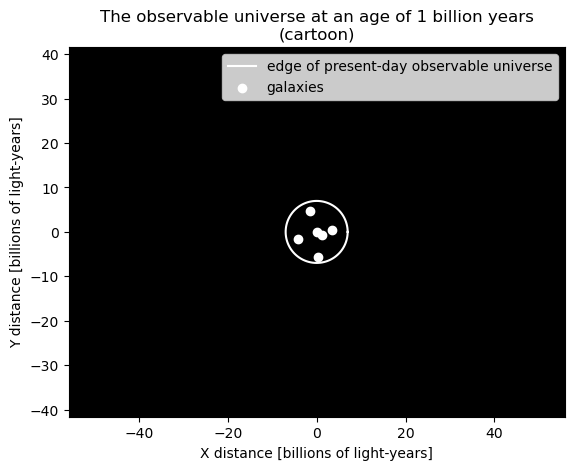

In [2]:
#Try changing this variable from 1 to 5 to 13.8, re-running the code each time
age_snapshot = 1 # age of the universe in units of billions of years

# The present-day observable universe's radius in units of billions of light years
observable_universe_radius = 46.5 

# The scale factor a(z(t))
scale_factor = cosmology_model.scale_factor(time_to_redshift(age_snapshot))

# Here we create a cartoon universe that expands over time
# --------------------------------------------------------

# Let's plot the edge of the modern day observable universe. As time goes on, light from the unobservable part of the universe will travel and reach us, 
# causing the radius of the observable universe to grow. This is a seperate effect from the universe's expansion, and we are not going to model it.
# Hence, we will plot the time evolution of the "present-day" observable universe's radius.
circle_y = [scale_factor*observable_universe_radius*np.sin(theta) for theta in np.linspace(0, 2*np.pi, 100)]
circle_x = [scale_factor*observable_universe_radius*np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100)]
plt.plot(circle_x, circle_y, color='white',label='edge of present-day observable universe')

# Let's plot the locations of some galaxies. DESI alone will map out tens of millions of galaxies, 
# but for simplicity, let's put six galaxies in our model.
plt.scatter(circle_x[2]*.5, circle_y[2]*.5,c='white',label='galaxies')
plt.scatter(circle_x[30]*.7, circle_y[30]*.7,c='white')
plt.scatter(circle_x[55]*.65, circle_y[55]*.65,c='white')
plt.scatter(circle_x[75]*.8, circle_y[75]*.8,c='white')
plt.scatter(circle_x[90]*.2, circle_y[90]*.2,c='white')
plt.scatter(0, 0, c='white')

# Some graph settings
plt.axis('equal');
plt.gca().set_facecolor("black")
plt.xlim(-1.2*observable_universe_radius,1.2*observable_universe_radius)
plt.ylim(-1.2*observable_universe_radius,1.2*observable_universe_radius);
plt.xlabel('X distance [billions of light-years]')
plt.ylabel('Y distance [billions of light-years]')
plt.legend(loc='upper right')
plt.title(f'The observable universe at an age of {age_snapshot} billion years\n(cartoon)');

Another way to visualize the universe's expansion is to plot how the scale factor changes over time.

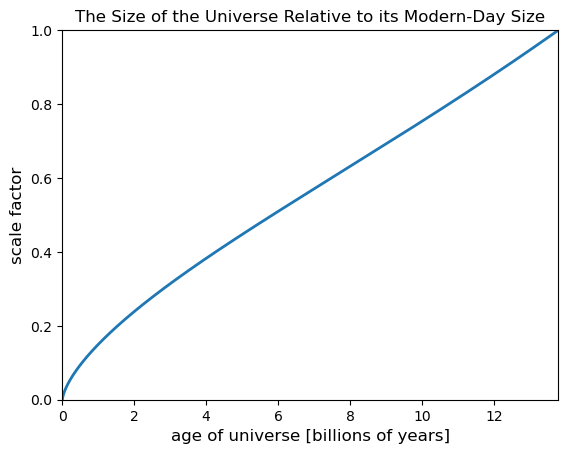

In [3]:
# The modern age of the universe at a redshift of z=0
age_of_universe = cosmology_model.age(0).value

# Let's plot the scale factor vs. the age of the universe
age = np.linspace (1e-3, age_of_universe, 10000)
scale_factor = cosmology_model.scale_factor(time_to_redshift(age))
plt.plot(age, scale_factor, linewidth=2)

# Plot settings
plt.ylim(0, 1)
plt.xlim(0, age_of_universe)
plt.xlabel('age of universe [billions of years]', fontsize = 12)
plt.ylabel('scale factor', fontsize = 12)
plt.title('The Size of the Universe Relative to its Modern-Day Size');

This plot shows us the same information as our previous visualization of the universe's size, except instead of looking at a single *age_snapshot* value, we are now looking at how the universe's size (the scale factor) changes across the universe's entire history.

Now that we've introduced the scale factor, we're ready to start talking about the types of distances that we measure in Cosmology.

# Distances in Cosmology

Since the **physical distance** between two galaxies A and B changes over time, cosmologists often use the concept of an equivalent **comoving distance**, which is defined to preserve a constant distance between A and B. While the physical distance between the galaxies expands over time, the comoving distance between them stays the same. A comoving distance ruler then expands over time at the same rate as the universe. The physical distance $x(t)$ and comoving distance $D_C$ are related by the scale factor:

$$ x(t) = a(t) D_C $$

As you might have seen in the [introduction notebook](https://github.com/DESIHIGH/desihigh/blob/main/Intro.ipynb), the measured **redshift** to a galaxy is a proxy for its distance from us. We can use a cosmology model to plot the comoving distance as a function of redshift.

Text(0.5, 0, 'lookback time [billions of years]')

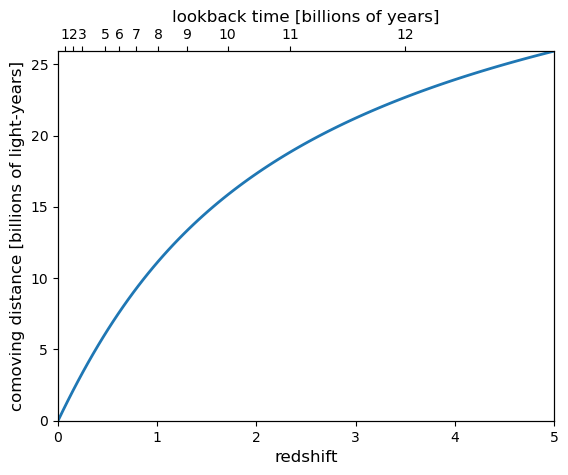

In [4]:
# Let's plot redshift vs. comoving distance
redshift = np.linspace(0,5,100)
comoving_distance = cosmology_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion
plt.plot(redshift, comoving_distance, linewidth=2)

# Plot settings
plt.ylim(0, np.max(comoving_distance))
plt.xlim(0, 5)
plt.xlabel('redshift', fontsize = 12)
plt.ylabel('comoving distance [billions of light-years]', fontsize = 12)
ax2 = plt.gca().twiny()
ax2.set_xlim(0, 5)
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5]
ax2.set_xticks(xticks)
xticks_labels = [f"{x:.0f}" for x in cosmology_model.lookback_time(xticks).value]
ax2.set_xticklabels(xticks_labels)
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12)


We have also plotted the **lookback time**, the amount of time it has taken for the light we observe in a distant galaxy to travel to us. Galaxies with higher redshifts are located further away from us, and it has then taken longer for their light to reach us.

Use the above plot to answer the following question: If a galaxy has a measured redshift of $z=2$, how long did it take for it's light to travel and reach us? What is the comoving distance to the galaxy? Once you have an answer, enter it into and run the below code, which will use the scale factor to calculate the physical distance to the galaxy.

In [ ]:
lookback_time = #enter your answer here (in units of billions of years)
comoving_distance = #enter yoru answer here (in units of billions of light-years)

# scale factor at a redshift of z=2
scale_factor = cosmology_model.scale_factor(2)

# physical distance to the galaxy back when the light we see was first emmited
physical_distance = scale_factor * comoving_distance 

print(f'The light we see from this galaxy traveled for {lookback_time} billion years to reach us.\nBack then, the physical distance to the galaxy was {physical_distance:.3f} billion light years')

# scale factor at a redshift of z=0
scale_factor = cosmology_model.scale_factor(0) 

# physical distance to the galaxy today
physical_distance = scale_factor * comoving_distance 

print(f'Today, when the light has reached us, the physical distance to the galaxy has increased to {physical_distance} billion light years')


The below code gives the official answer for our galaxy. How does your estimate compare?

In [5]:
# lookback time for a redshift of z=2
lookback_time = cosmology_model.lookback_time(2).value

# scale factor at a redshift of z=2
scale_factor = cosmology_model.scale_factor(2) 

#comoving distance for a galaxy at redshift z=2
comoving_distance = cosmology_model.comoving_distance(2).value 

# physical distance to the galaxy back when the light we see was first emmited
physical_distance = scale_factor * comoving_distance * 3.261598 * 1e-3 #unit conversion

print(f'The light we see from this galaxy traveled for {lookback_time:.3f} billion years to reach us.\nBack then, the physical dintance to the galaxy was {physical_distance:.3f} billion light years')

# scale factor at a redshift of z=0
scale_factor = cosmology_model.scale_factor(0) 

# comoving distance for a galaxy at redshift z=2
comoving_distance = cosmology_model.comoving_distance(2).value 

# physical distance to the galaxy today
physical_distance = scale_factor * comoving_distance * 3.261598 * 1e-3 #unit conversion

print(f'Today, when the light has reached us, the physical distance to the galaxy has increased to {physical_distance:.3f} billion light years')


The light we see from this galaxy traveled for 10.523 billion years to reach us.
Back then, the physical dintance to the galaxy was 5.775 billion light years
Today, when the light has reached us, the physical distance to the galaxy has increased to 17.326 billion light years


Let's take another look at our redshift vs. comoving distance graph, this time focusing on low redshifts (red shaded region):

Text(0.5, 0, 'lookback time [billions of years]')

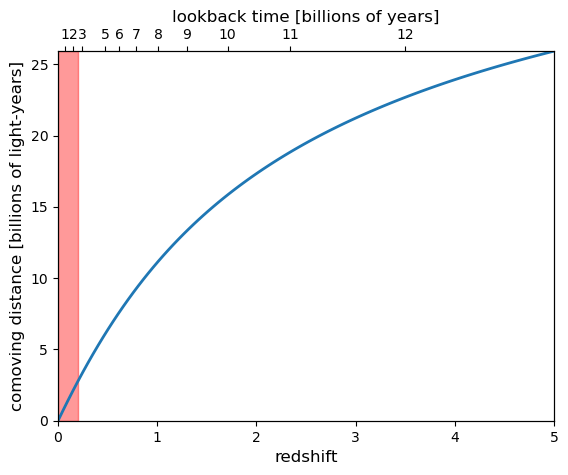

In [6]:
# Let's plot redshift vs. comoving distance
redshift = np.linspace(0,5,100)
comoving_distance = cosmology_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion
plt.axvspan(0, .2, alpha=0.4, color='red')
plt.plot(redshift, comoving_distance, linewidth=2)

# Plot settings
plt.ylim(0, np.max(comoving_distance))
plt.xlim(0, 5)
plt.xlabel('redshift', fontsize = 12)
plt.ylabel('comoving distance [billions of light-years]', fontsize = 12)
ax2 = plt.gca().twiny()
ax2.set_xlim(0, 5)
xticks = [.073, .153, .245, .473, .615, .79, 1.01, 1.3, 1.71, 2.34, 3.5]
ax2.set_xticks(xticks)
xticks_labels = [f"{x:.0f}" for x in cosmology_model.lookback_time(xticks).value]
ax2.set_xticklabels(xticks_labels)
ax2.set_xlabel("lookback time [billions of years]", fontsize = 12)


In the red shaded region, the slope of the blue line is nearly constant. This means that at low redshift, we can use the equation of a line (Hubble's law) to calculate the comoving distance to a galaxy from a measured redshift. 

$$D_C=\frac{c}{H_0}z$$

The slope of our line is $\frac{c}{H_0}$, where $c$ is the speed of light, and $H_0$ is the Hubble Constant, a measure of the universe's expansion rate. How then can we calculate the comoving distance in the rest of the plot, where the blue line curves? To measure the comoving distance at larger redshifts, we can use an integral version of the above equation (don't worry if this math notation is unfamiliar to you):

$$ D_C = \frac{c}{H_0}\int_0^z \frac{\mathrm{d}z'}{E(z')}$$

$$ E(z') = \sqrt{\Omega_M (1+z')^3 + \Omega_\Lambda} $$

Here $\Omega_M$ is the percentage of the universe made up of matter, and $\Omega_\Lambda$ is the percentage of the universe made up of dark energy. For the cosmology model that we have been using, $\Omega_M=0.315$ (31.5%) and $\Omega_\Lambda=0.685$ (68.5%)

Whenever we use a python package to calculate the comoving distance, under the hood, it is solving an integral equation similar to the one above, with user-provided values for the cosmological parameters. Try changing the $\Omega_M$ (omega_matter) parameter to different values between 0 (no matter, all dark energy) and 1 (all matter, no dark energy) to see how the calculated distance changes

In [7]:
omega_matter = .315 #try changing this between 0 and 1

# create a cosmology model with our omega_matter value. We will assume that the Hubble constant is H_0 = 67.4 km/s/Mpc
new_cosmology_model = FlatLambdaCDM(Om0=omega_matter, H0=67.4)

# our galaxy has a measured redshift of z=2
redshift = 2 

#get the comoving distance to our galaxy
comoving_distance = new_cosmology_model.comoving_distance(redshift).value * 3.261598 * 1e-3 #unit conversion

print(f'Our galaxy has a comoving distance of {comoving_distance:.3f} billion light-years')

Our galaxy has a comoving distance of 17.326 billion light-years


That's quite a bit of variation! In order to make an accurate distance measurement, we need accurate values of $\Omega_M$, $\Omega_\Lambda$, $H_0$, and other, similar cosmological parameters. Cosmologists are confident in modern measurements of these values, though there are conflicting measurements for $H_0$, a dilemma that we call the "Hubble tension." Addressing this tension is a major research effort in cosmology.

### Planning:


curvature, transverse and parallel measures of comoving distance (worth going into?)

angular diameter distance

luminosity distance

light travel distance

Planning questions:

what level of detail should we go into? Distance integrals? E(z) and cosmological parameters? Friedmann Equations?

How can we make the notebook more interactive/data-based instead of simply explaining concepts and equations?